## ความเร็วในการแพร่กระจายของเชื้อ COVID-19
- data source: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# pandas display options
pd.set_option('display.max_rows', 10)

In [3]:
df = pd.read_csv('COVID-19_cases_2020.csv')
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,25/3/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,24/3/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,23/3/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,22/3/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

In [5]:
df['dateRep'] = pd.to_datetime(df['dateRep'])
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     61900 non-null  datetime64[ns]
 1   day                                                         61900 non-null  int64         
 2   month                                                       61900 non-null  int64         
 3   year                                                        61900 non-null  int64         
 4   cases                                                       61900 non-null  int64         
 5   deaths                                                      61900 non-null  int64         
 6   countriesAndTerritories                                     61900 non-null  object        
 7   geoId                 

In [7]:
df.sort_values(['countriesAndTerritories', 'dateRep'], inplace=True)
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
339,2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
338,2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
307,2020-01-02,1,2,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,0.000000
278,2020-01-03,1,3,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,0.002629
257,2020-01-04,1,4,2020,25,0,Afghanistan,AF,AFG,38041757.0,Asia,0.378531
...,...,...,...,...,...,...,...,...,...,...,...,...
61694,2020-12-10,12,10,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,1.358782
61663,2020-12-11,12,11,2020,57,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,2.369333
61633,2020-12-12,12,12,2020,81,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,9.887014
61632,2020-12-13,13,12,2020,57,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,9.538784


In [8]:
df.reset_index(drop=True, inplace=True)
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
1,2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
2,2020-01-02,1,2,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,0.000000
3,2020-01-03,1,3,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,0.002629
4,2020-01-04,1,4,2020,25,0,Afghanistan,AF,AFG,38041757.0,Asia,0.378531
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,2020-12-10,12,10,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,1.358782
61896,2020-12-11,12,11,2020,57,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,2.369333
61897,2020-12-12,12,12,2020,81,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,9.887014
61898,2020-12-13,13,12,2020,57,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,9.538784


In [9]:
dd = df.groupby('dateRep').sum()[['cases', 'deaths']]
dd

,cases,deaths
dateRep,,
2019-12-31,27,0
2020-01-01,0,0
2020-01-02,2121,46
2020-01-03,1843,58
2020-01-04,74847,4677
...,...,...
2020-12-10,304057,3973
2020-12-11,623511,10611
2020-12-12,657140,12355


In [10]:
dc = dd.cumsum()
dc.reset_index(inplace=True)

In [25]:
dc[:20]

,dateRep,cases,deaths
0,2019-12-31,27,0
1,2020-01-01,27,0
2,2020-01-02,2148,46
3,2020-01-03,3991,104
4,2020-01-04,78838,4781
...,...,...,...
15,2020-01-15,2262695,50481
16,2020-01-16,2262695,50481
17,2020-01-17,2262700,50481
18,2020-01-18,2262717,50481


In [12]:
# Thai font in chart
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=17

Text(0, 0.5, 'cases')

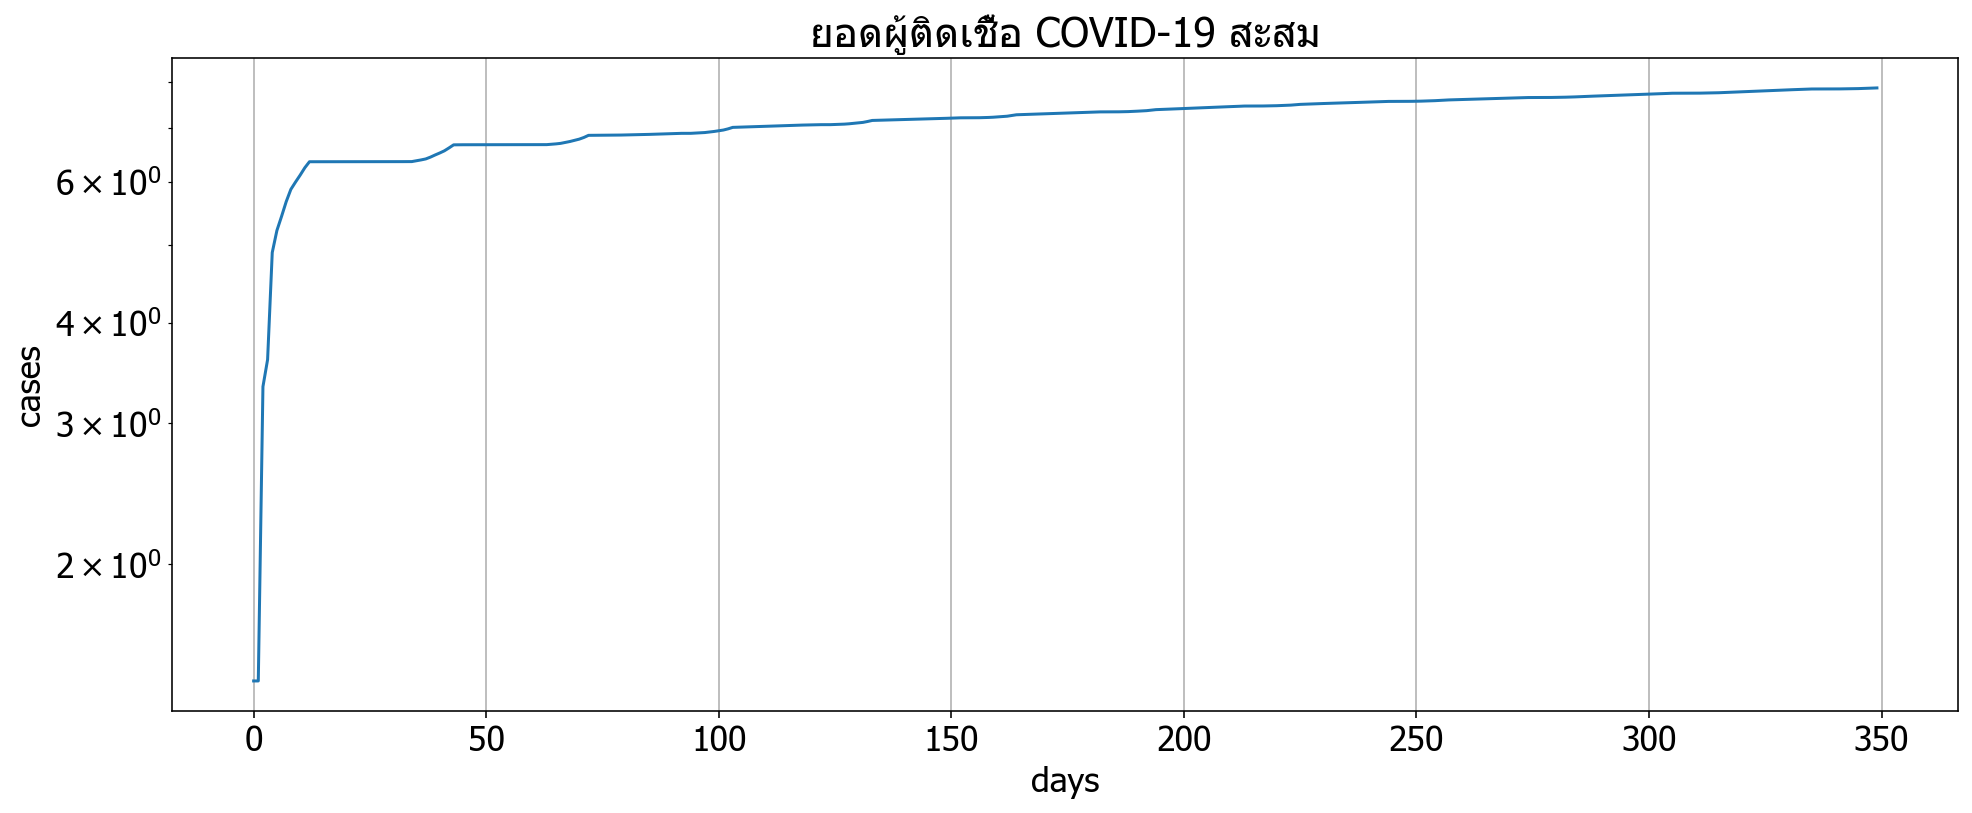

In [13]:
plt.figure(figsize=(16, 6))
plt.axes(yscale='log')
plt.grid(True)
sns.lineplot(x=dc.index, y=dc.cases)
plt.title(f'ยอดผู้ติดเชื้อ COVID-19 สะสม')
plt.xlabel('days')
plt.ylabel('cases')

In [21]:
dc[dc['cases'] < 100]['cases'].count()

2

In [16]:
dc[:20]

,dateRep,cases,deaths
0,2019-12-31,27,0
1,2020-01-01,27,0
2,2020-01-02,2148,46
3,2020-01-03,3991,104
4,2020-01-04,78838,4781
...,...,...,...
15,2020-01-15,2262695,50481
16,2020-01-16,2262695,50481
17,2020-01-17,2262700,50481
18,2020-01-18,2262717,50481


In [15]:
for n in [100, 1000, 5000, 10000, 100000, 500000, 1000000, 2000000]:
    days=dc[dc['cases'] < n]['cases'].count() + 1
    print(f"take {days:3} days to infect {n:10,} cases.")

take   3 days to infect        100 cases.
take   3 days to infect      1,000 cases.
take   5 days to infect      5,000 cases.
take   5 days to infect     10,000 cases.
take   6 days to infect    100,000 cases.
take   9 days to infect    500,000 cases.
take  11 days to infect  1,000,000 cases.
take  13 days to infect  2,000,000 cases.


In [22]:
prev=0
for n in [100, 1000, 5000, 10000, 100000, 500000, 1000000, 2000000]:
    days=dc[dc['cases'] < n]['cases'].count() + 1
    print(f"take {days - prev:3} days to infect {n:10,} cases.")
    prev=days

take   3 days to infect        100 cases.
take   0 days to infect      1,000 cases.
take   2 days to infect      5,000 cases.
take   0 days to infect     10,000 cases.
take   1 days to infect    100,000 cases.
take   3 days to infect    500,000 cases.
take   2 days to infect  1,000,000 cases.
take   2 days to infect  2,000,000 cases.
